In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

customers = {'CustomerID': [10, 11],
         'Name': ['Mike', 'Marcia'],
         'Address': ['Address for Mike','Address for Marcia']}
customers = pd.DataFrame(customers)
customers

(cont:scheduling:scheduling:policies)=
# Simple Examples of Scheduling Policies

Now that we have a collection of requirements, let's look at a few simple possibilities. 

```{sidebar} Definitions: 
We use some previously introduced terms, and add a few more:
- **Context switch**: Switching the CPU from running one task to another, i.e., saving the processor registers used by the running task into its thread struc, and loading some other task's registers into the CPU. 
- **Preemption**: Stopping a task to run another one. 
- **Response time**: How long does it take for an application to respond to external events.
- **Quantum** or **Time slice**: The amount of time that a task is allowed to run before the kernel preempts it to run another.  
```

## First Come, First Served (FCFS)

The simplest scheduling policy just processes each task to completion in the order that they arrived. Just like waiting in line at the local government office, each process gets into a queue and the processor executes the first process in that queue until it completes. Then we repeat the same. 

One problem with the FCFS policy is that it can result in poor average turnaround time.  Let us consider a situation with three tasks that arrive at around the same start time with the run time shown in the table below:

| Task | Start | Runtime (min)     |
| :--: | :---: | :----------: |
|A    | ~0     | 6            |
| B    | ~0     | 2            |
| C    | ~0     | 1            |

If they are run in the order A, B, C, they will execute on the processor as shown below.  

```{figure} ../images/scheduling/FIFO-1.png
---
name: VP:sched:FIFO
---
FIFO with tasks run in order A, then B, then C
```



So the average turnaround time is: $(6 + 8 + 9)/3 = 7.7 min$

On the other hand, if the tasks are run in the order C, B, A, they will execute on the processor as shown below.  

```{figure} ../images/scheduling/FIFO-2.png
---
name: VP:sched:FIFO2
---
FIFO with tasks run in order C, then B, then A
```

So the average turnaround time is: $(1 + 3 + 9)/3 = 4.7 min$

We see here that when short tasks are processed after long tasks the long ones have a major impact on the short ones, while if the order is reversed, the impact on the long tasks running after the short ones is much less. 


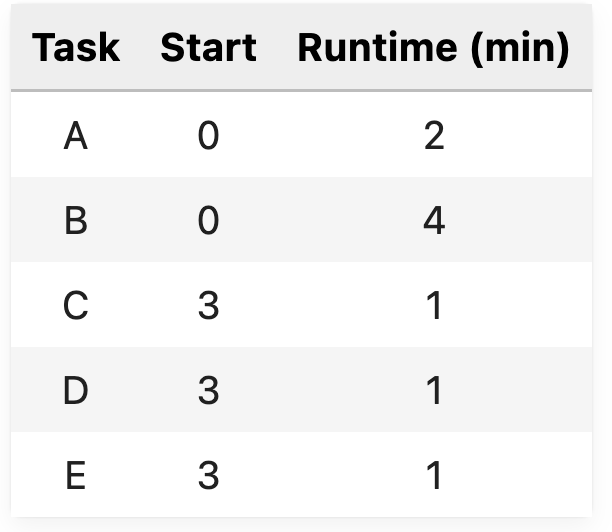## Shortest Job First (SJF)

For some systems, for example Batch, we know a-priori how long a task will take.  Hence, rather than running them in the order they arrived, we can sort them based on how long the tasks will take and always run the shortest tasks first to get the better turnaround time shown in  {numref}`VP:sched:FIFO2`.   This policy is called shortest job first, and will always yield the optimal turnaround time. 

Let us, however, consider the case below, where tasks A and B arrive at time 0, and tasks C, D, and E arrive at time 3. 

| Task | Start | Runtime (min)     |
| :--: | :---: | :----------: |
| A    | 0     | 2            |
| B    | 0     | 4            |
| C    | 3     | 1            |
| D    | 3     | 1            |
| E    | 3     | 1            |

If we run jobs to completion we will get the following:

```{figure} ../images/scheduling/SJF-1.png
---
name: VP:sched:SJF1
---
SJF without preemption
```
So the average turnaround time is: $(2 + 6 + 7 + 8 + 9)/3 = 10.7  min$

If we instead preempt B to run the new jobs who's time is shorter than B's remaining time, we get the following execution:

```{figure} ../images/scheduling/SJF-2.png
---
name: VP:sched:SJF2
---
SJF with preemption
```
With a shorter average turnaround time of $(2 + 4 + 5 + 6 + 9)/3 = 8.6$

This demonstrates the value of preemption, where we can stop long running tasks to get short ones in and out of the system quickly.  

To understand the major problem with Shortest Job consider what happens if one minute tasks continue to arrive every minute starting at minute 4.  B will never complete, or in scheduling terminology, it will *starve* even though the system is processing work as fast as it is arriving.  **Starvation** is a major problem with a pure shortest job first algorithm. 



## Round Robin

With SJF, we found that if we preempt a long running task when a short one arrives, we can improve turn around time.  In many environments, we don't know how long a task will take, and, rather than just using the CPU, many tasks switch back and forth between using the CPU and doing I/O.

We illustrated in {numref}`img:vp:cpuvsio` how a CPU and I/O intensive application might use the CPU.  For such tasks, if we can make sure that CPU intensive tasks don't block I/O intensive ones for too long, the system will enable the I/O intensive ones to better use the I/O devices while the CPU intensive task has only modest impact from the short periods of time that the I/O intensive ones use it.  Also, if a user is interacting with the I/O intensive one, e.g. running emacs, the *Response Time* is less affected by the CPU intensive applications. 

The *Round Robin* algorithm builds a simple FIFO run queue of tasks in the ready state much like the FIFO algorithm described earlier. When a task starts running it is given a fixed amount of time to run, often called a *Quantum* or *Time slice*.  When the quantum  expires the OS does a context switch to the next task in the queue and adds the previously running task at the back of the queue.  

Let us consider a situation with three tasks shown in the table below:

| Task | Start | Runtime     |
| :--: | :---: | :----------: |
| A    | 1     | 6            |
| B    | 1.1     | 2            |
| C    | 1.3     | 1            |

Let us assume that the quantum is the (unrealistically) 1 minute.  In that case, a round robin scheduler will run tasks as shown in {numref}`VP:sched:RR` below:

```{figure} ../images/scheduling/RR.png
---
name: VP:sched:RR
---
Round Robin scheduling, where every task executes for a quantum of time. 
```
The average turnaround time of this round robin schedule is $(2 + 4 + 5 + 6 + 9)/3 = 8.6$

We can see that it is terrible compared to SJF, but much better than the worst FIFO case. 

The preemptive scheduling models introduces a new parameter we need to set: the length of the quantum. We have to weigh the cost of changing processes against the interactivity requirements when deciding on the length of a time we will run CPU intensive tasks.  You want to pick a time large enough that you are **amortizing** the cost of a context switch; if you picked a time that was a few hundred computer cycles you would be spending most of your time context switching.   On the other hand, if you it is too long, interactive tasks would get terrible response rate.  In all the above calculations we have assumed that the time for a context switch is irrelevant when we calculate turn around time, but in a real system this is not always a good assumption.  




These examples are not exhaustive, there are other algorithms for selecting the next runnable process, however these examples are meant to illustrate that there are a number of ways to approach this problem and this is an active area of research today.